In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [2]:
#Read in the image
image = cv2.imread('1_1_Image_Representation/images/pizza_bluescreen.jpg')

#Print out the type of image data and its dimensions
print('This image is: ', type(image),
     ' with dimaensions:', image.shape)

This image is:  <class 'numpy.ndarray'>  with dimaensions: (514, 816, 3)


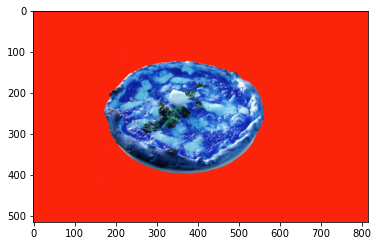

In [3]:
%matplotlib inline

# Display the image
plt.imshow(image)

# It doesn't work because OpenCV reads in color images as BGR

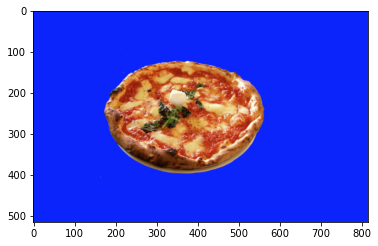

In [4]:
image_copy = np.copy(image)

#Change colors for openCV
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

#Display the image
plt.imshow(image_copy)

#### Define the color threshold

In [5]:
# Define our color selection boundaries in RGB values
lower_blue = np.array([0,0,230])
upper_blue = np.array([50,50,255])

#### Create a mask

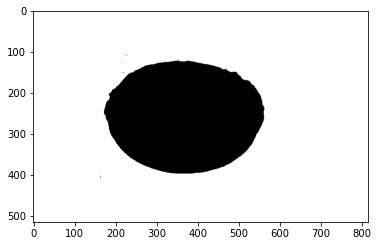

In [6]:
# Define the masked area
mask = cv2.inRange(image_copy, lower_blue, upper_blue)

# Visualize the mask
plt.imshow(mask, cmap='gray')

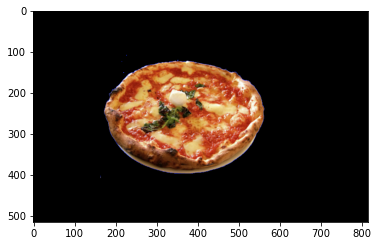

In [7]:
# Mask the image to let the pizza show through
masked_image = np.copy(image_copy)

masked_image[mask != 0] = [0,0,0]

# Display it!
plt.imshow(masked_image)

#### Mask and add a background image

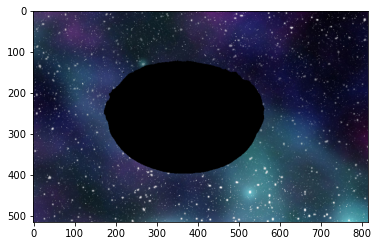

In [8]:
# Load in a background image, and convert it to RGB
background_image = cv2.imread('1_1_Image_Representation/images/space_background.jpg')
background_image = cv2.cvtColor(background_image, cv2.COLOR_BGR2RGB)

# Crop it to the right size (514 x 816)
crop_background = background_image[0:514, 0:816]

# Mask the cropped background so that the pizza area is blocked
crop_background[mask == 0] = [0,0,0]

# Display the background
plt.imshow(crop_background)

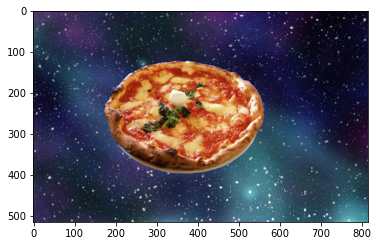

In [9]:
# Add the two images together to create a complete image!
complete_image = crop_background + masked_image

plt.imshow(complete_image)